# Fingerprint bit coverage and variability

We check the coverage and variability of fingerprint bit positions across all fingerprints in our dataset.

- Investigate missing bits across fingerprints
- Investigate bit variability across fingerprints (standard deviation)
- Get top X bit positions with no/high standard deviation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from kissim.encoding import FingerprintGenerator

In [3]:
plt.style.use("seaborn")

In [4]:
HERE = Path(_dh[-1])  # noqa: F821
RESULTS = HERE / "../../results/"

## Load fingerprints

Let's load our pre-calculated fingerprint saved in a _json_ file as `FingerprintGenerator` object.

In [5]:
fingerprint_generator = FingerprintGenerator.from_json(
    RESULTS / "fingerprints_clean.json", normalize=True
)

In [6]:
n_fingerprints = len(fingerprint_generator.data)
print(f"Number of fingerprints: {n_fingerprints}")

Number of fingerprints: 5222


## Missing bits across fingerprints

In [7]:
def nan_bit_ratio(fingerprint_generator, feature_group):

    if feature_group == "physicochemical":
        features = fingerprint_generator.physicochemical_exploded()
        features = features.drop(["sco.vertex_angle", "exposure.ratio"], axis=1)
    elif feature_group == "distances":
        features = fingerprint_generator.distances_exploded()
    elif feature_group == "moments":
        features = fingerprint_generator.moments_exploded()
    else:
        raise KeyError("Feature group unknown.")

    features = features.unstack()
    features_nan = features.isnull().sum(axis=0) / len(features)
    features_nan = features_nan.unstack(0)

    return features_nan

![KLIFS kinase sequence logo](https://klifs.net/images/faq/colors.png)

### Missing physicochemical bits

In [8]:
feature_group = "physicochemical"
features_nan = nan_bit_ratio(fingerprint_generator, feature_group)
features_nan

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure
residue_ix,,,,,,,,
1,0.005936,0.005936,0.005936,0.005936,0.005936,0.005936,0.073152,0.005936
2,0.005170,0.005170,0.005170,0.005170,0.005170,0.005170,0.033129,0.005170
3,0.005745,0.005745,0.005745,0.005745,0.005745,0.005745,0.010915,0.005936
4,0.017043,0.017043,0.017043,0.017043,0.017043,0.017043,0.941210,0.017235
5,0.044427,0.044427,0.044427,0.044427,0.044427,0.044427,0.144581,0.044810
...,...,...,...,...,...,...,...,...
81,0.001915,0.001915,0.001915,0.001915,0.001915,0.001915,0.010149,0.002298
82,0.010532,0.010532,0.010532,0.010532,0.010532,0.010532,0.014171,0.010532
83,0.036193,0.036193,0.036193,0.036193,0.036193,0.036193,0.982382,0.036768


In [9]:
features_nan.describe()

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.015635,0.015635,0.015635,0.015635,0.015635,0.015635,0.099187,0.015842
std,0.040772,0.040772,0.040772,0.040772,0.040772,0.040772,0.211893,0.040899
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000383,0.000000
25%,0.000574,0.000574,0.000574,0.000574,0.000574,0.000574,0.006319,0.000957
50%,0.002298,0.002298,0.002298,0.002298,0.002298,0.002298,0.022788,0.002489
75%,0.008426,0.008426,0.008426,0.008426,0.008426,0.008426,0.068173,0.008426
max,0.316162,0.316162,0.316162,0.316162,0.316162,0.316162,0.982382,0.316545


#### Heatmap (for an overview)

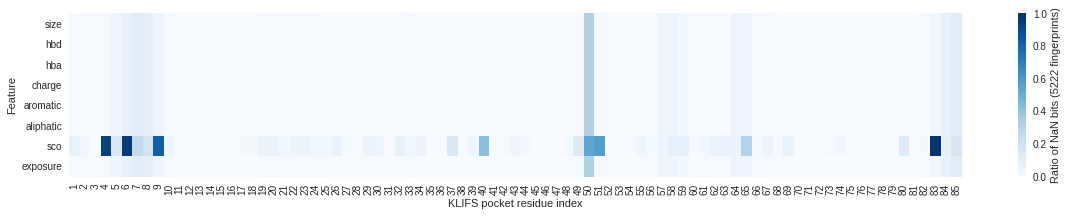

In [10]:
plt.figure(figsize=(20, 3))
sns.heatmap(
    features_nan.transpose(),
    cmap="Blues",
    cbar_kws={"label": f"Ratio of NaN bits ({n_fingerprints} fingerprints)"},
    vmin=0,
    vmax=1,
)
plt.xlabel("KLIFS pocket residue index")
plt.ylabel("Feature");

![KLIFS kinase sequence logo](https://klifs.net/images/faq/colors.png)

#### Barplot (for concrete values)

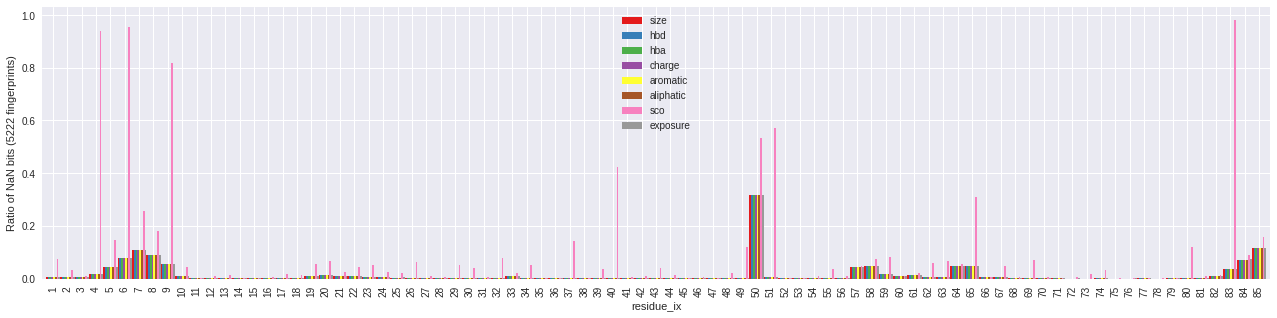

In [11]:
ax = features_nan.plot(kind="bar", figsize=(22, 5), width=1, colormap="Set1")
ax.set_ylabel(f"Ratio of NaN bits ({n_fingerprints} fingerprints)");

__Observations__

- _Side chain orientation_: Gly-rich positions (e.g. 4, 6, 9, 83) have high ratios of missing side orientation values because Gly has no side chain.
- _All feature types_: Higher ratios of missing bits for pocket positions with high ratio of missing residues (e.g. 50, 4-9, 83-58). Check out pattern resemblance with plot on "Missing residues in the kinase binding site" in [this notebook](https://github.com/volkamerlab/kissim_app/blob/master/notebooks/dataset/explore_dataset.ipynb).

### Missing distance bits

In [12]:
feature_group = "distances"
features_nan = nan_bit_ratio(fingerprint_generator, feature_group)
features_nan

,hinge_region,dfg_region,front_pocket,center
residue_ix,,,,
1,0.007660,0.017618,0.006319,0.005936
2,0.006894,0.017043,0.005553,0.005170
3,0.007468,0.017618,0.006128,0.005745
4,0.019150,0.029299,0.017809,0.017426
5,0.046534,0.055917,0.045193,0.044810
...,...,...,...,...
81,0.002872,0.012830,0.004021,0.001915
82,0.011490,0.021448,0.012639,0.010532
83,0.037725,0.047491,0.038874,0.036768


In [13]:
features_nan.describe()

,hinge_region,dfg_region,front_pocket,center
count,85.000000,85.000000,85.000000,85.000000
mean,0.017595,0.027262,0.017365,0.015734
std,0.040630,0.040425,0.040655,0.040792
min,0.002298,0.012447,0.002106,0.000000
25%,0.002489,0.012830,0.002298,0.000766
50%,0.004404,0.013788,0.004213,0.002489
75%,0.010149,0.018767,0.009958,0.008426
max,0.317120,0.327461,0.317311,0.316162


#### Heatmap (for an overview)

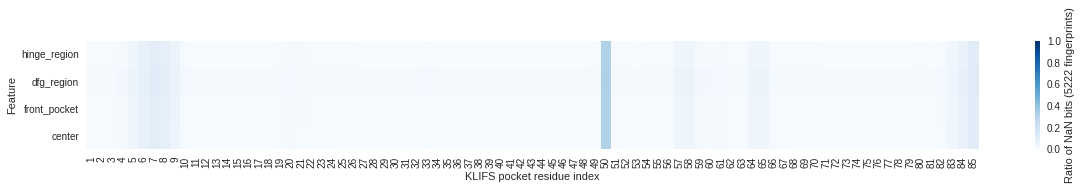

In [14]:
plt.figure(figsize=(20, 2))
sns.heatmap(
    features_nan.transpose(),
    cmap="Blues",
    cbar_kws={"label": f"Ratio of NaN bits ({n_fingerprints} fingerprints)"},
    vmin=0,
    vmax=1,
)
plt.xlabel("KLIFS pocket residue index")
plt.ylabel("Feature");

#### Barplot (for concrete values)

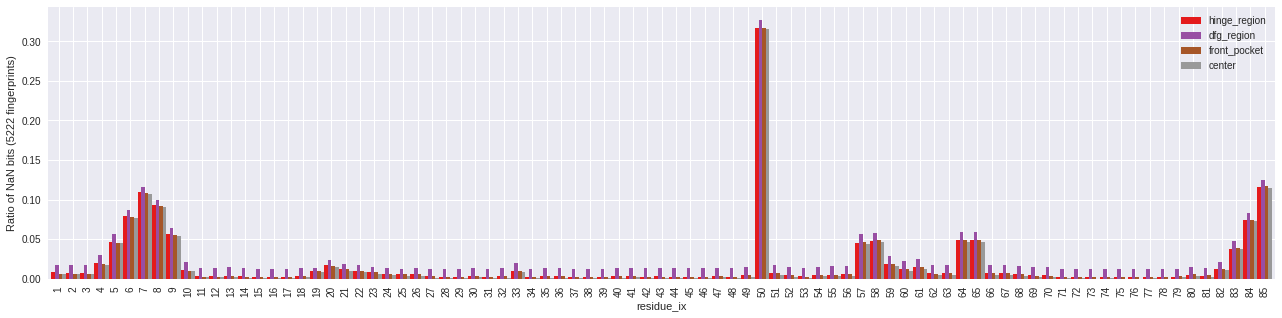

In [15]:
ax = features_nan.plot(kind="bar", figsize=(22, 5), width=1, colormap="Set1")
ax.set_ylabel(f"Ratio of NaN bits ({n_fingerprints} fingerprints)");

__Observations__

- As before for the physicochemical bits, the pattern here resembles the missing residue pattern.

### Missing moments bits

In [16]:
feature_group = "moments"
features_nan = nan_bit_ratio(fingerprint_generator, feature_group)
features_nan

,hinge_region,dfg_region,front_pocket,center
moment,,,,
1,0.002298,0.012447,0.002106,0.0
2,0.002298,0.012447,0.002106,0.0
3,0.002298,0.012447,0.002106,0.0


In [17]:
features = fingerprint_generator.moments_exploded()
structures_nan = features[features.isna().any(axis=1)]
print(
    f"Number of structures with at least one NaN moment: "
    f"{len(structures_nan.index.get_level_values(0).unique())}"
)
structures_nan

Number of structures with at least one NaN moment: 73


hinge_region  dfg_region  front_pocket     center
structure_klifs_id moment                                                   
3408               1          12.649982         NaN     12.883488  11.804442
                   2           4.611194         NaN      4.181470   3.537722
                   3           2.942645         NaN      2.775222   1.975019
2542               1          12.814661         NaN     12.929758  12.332133
                   2           4.806795         NaN      4.490312   3.976784
...                                 ...         ...           ...        ...
13458              2                NaN         NaN      4.831459   3.488443
                   3                NaN         NaN      4.697454   3.374173
13457              1                NaN         NaN     13.185625  12.382970
                   2                NaN         NaN      4.790415   3.443742
                   3                NaN         NaN      4.584029   3.295044

[219 rows x 4 columns]

__Observations__

- About 70 structures show at least one empty moment, matching well with the number of structures for which one or more subpocket centers could not be determined and thus, no distance distribution and no corresponding moments could be inferred. Check out "Number of structures that will have no subpocket centers" in [this notebook](https://github.com/volkamerlab/kissim_app/blob/master/notebooks/dataset/explore_dataset.ipynb).

## Bit variability across fingerprints

In [18]:
def bit_variability(fingerprint_generator, feature_group):

    if feature_group == "physicochemical":
        features = fingerprint_generator.physicochemical_exploded()
        features = features.drop(["sco.vertex_angle", "exposure.ratio"], axis=1)
    elif feature_group == "distances":
        features = fingerprint_generator.distances_exploded()
    elif feature_group == "moments":
        features = fingerprint_generator.moments_exploded()
    else:
        raise KeyError("Feature group unknown.")

    features = features.unstack()
    features_std = features.std()
    features_std = features_std.unstack(0)

    return features_std

### Physicochemical bit variability

In [19]:
features_std = bit_variability(fingerprint_generator, "physicochemical")
features_std

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure
residue_ix,,,,,,,,
1,0.619667,0.973695,0.839013,0.788640,0.147822,0.325461,0.499800,0.534327
2,0.615464,0.713208,0.701777,0.616877,0.191489,0.499848,0.444900,0.294509
3,0.319752,0.064963,0.063520,0.036717,0.051862,0.073245,0.477106,0.249808
4,0.244984,0.174421,0.137261,0.062422,0.059119,0.202121,0.653328,0.900002
5,0.647314,0.888735,0.795963,0.729345,0.132367,0.339897,0.216861,0.381621
...,...,...,...,...,...,...,...,...
81,0.086306,0.041523,0.191472,0.102192,0.027695,0.057024,0.419858,0.528382
82,0.297498,0.234975,0.140715,0.031096,0.236063,0.229438,0.326291,0.494333
83,0.094310,0.120640,0.161522,0.066024,0.024410,0.096193,0.435385,0.724784


In [20]:
features_std.describe()

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.487516,0.495476,0.411051,0.280591,0.208545,0.305540,0.374135,0.524183
std,0.189946,0.303126,0.256747,0.248739,0.142390,0.140259,0.195444,0.162449
min,0.027738,0.000000,0.000000,0.000000,0.000000,0.039125,0.027850,0.064806
25%,0.373239,0.255949,0.195785,0.058638,0.103323,0.202121,0.222950,0.438225
50%,0.505429,0.483873,0.424170,0.195328,0.192201,0.325461,0.419858,0.526467
75%,0.619667,0.680912,0.614840,0.505784,0.319676,0.433938,0.510163,0.615960
max,0.824865,1.249968,0.920223,0.792068,0.499924,0.500041,0.812722,0.900002


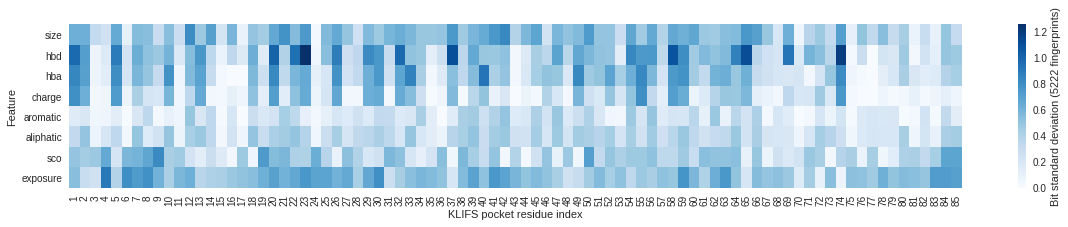

In [21]:
plt.figure(figsize=(20, 3))
sns.heatmap(
    features_std.transpose(),
    cmap="Blues",
    cbar_kws={"label": f"Bit standard deviation ({n_fingerprints} fingerprints)"},
)
plt.xlabel("KLIFS pocket residue index")
plt.ylabel("Feature");

__Observations__

- Highest variability for HBD, lowest for aromatic and aliphatic
- Conserved regions show as expected rigid size/pharmacophoric feature variability (e.g. 4, 6, 17, 24, 70, 75, 81-83).

![KLIFS kinase sequence logo](https://klifs.net/images/faq/colors.png)

### Distances bit variability

In [22]:
features_std = bit_variability(fingerprint_generator, "distances")
features_std

,hinge_region,dfg_region,front_pocket,center
residue_ix,,,,
1,0.556834,0.932361,0.791084,0.622932
2,0.611980,1.132765,0.919286,0.784218
3,0.913001,1.089721,1.247761,1.033830
4,0.890977,1.411021,1.298377,1.079320
5,0.956074,1.694623,1.391972,1.253788
...,...,...,...,...
81,0.659300,0.772370,0.868227,0.693279
82,1.121988,1.065912,1.793751,0.746917
83,1.224078,1.736341,1.759962,0.939910


In [23]:
features_std.describe()

,hinge_region,dfg_region,front_pocket,center
count,85.000000,85.000000,85.000000,85.000000
mean,0.861550,1.048813,0.997024,0.907436
std,0.448798,0.381460,0.515740,0.410115
min,0.286982,0.503634,0.396263,0.440120
25%,0.512859,0.772732,0.611381,0.631784
50%,0.809806,0.996977,0.856632,0.784218
75%,1.035744,1.208698,1.144141,1.068337
max,2.305634,2.173340,2.912288,2.383548


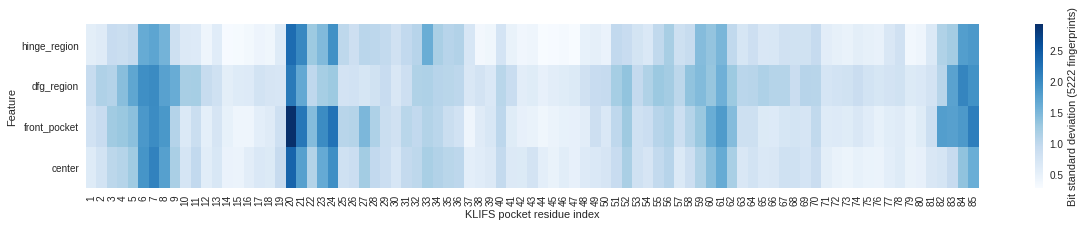

In [24]:
plt.figure(figsize=(20, 3))
sns.heatmap(
    features_std.transpose(),
    cmap="Blues",
    cbar_kws={"label": f"Bit standard deviation ({n_fingerprints} fingerprints)"},
)
plt.xlabel("KLIFS pocket residue index")
plt.ylabel("Feature");

__Observations__

- Higher variability for 
  - residues 6-8 (part of the G-loop, known for loop flexibility) 
  - residues 20-24 (part of aC-helix, known for conformational changes)
  - residues 82-85 (part of DFG-loop and activation loop, know for conformational changes) 
  - residues 59-61 (part of aE-helix, ???)
  - residue 33 w.r.t. hinge region (???)

![KLIFS kinase sequence logo](https://klifs.net/images/faq/colors.png)

![](https://klifs.net/images/faq/pocket.png)

### Moments bit variability

In [25]:
features_std = bit_variability(fingerprint_generator, "moments")
features_std

,hinge_region,dfg_region,front_pocket,center
moment,,,,
1,0.196949,0.339818,0.239254,0.204455
2,0.165404,0.224037,0.301386,0.163233
3,0.540371,0.626146,0.578200,1.158101


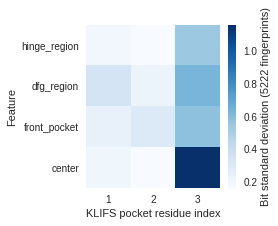

In [26]:
plt.figure(figsize=(3, 3))
sns.heatmap(
    features_std.transpose(),
    cmap="Blues",
    cbar_kws={"label": f"Bit standard deviation ({n_fingerprints} fingerprints)"},
)
plt.xlabel("KLIFS pocket residue index")
plt.ylabel("Feature");

## Top X bit with no/low/high variability

Get per-bit standard deviation for all feature types and check for bits with no/low/high variability.

In [27]:
bits_std = []
for feature_group in ["physicochemical", "distances", "moments"]:
    bits_std.append(bit_variability(fingerprint_generator, feature_group).unstack())
bits_std = pd.concat(bits_std)
bits_std.index.names = ["feature", "residue_ix"]
print(f"Number of bits with std: {len(bits_std)}")

Number of bits with std: 1032


### No variability

In [28]:
bits_std_no_variability = bits_std[bits_std == 0]
bits_std_no_variability.sort_index(level=1)

feature   residue_ix
hba       16            0.0
aromatic  17            0.0
hba       17            0.0
aromatic  36            0.0
charge    43            0.0
aromatic  70            0.0
charge    76            0.0
          77            0.0
hba       77            0.0
hbd       77            0.0
dtype: float64

In [29]:
print(
    f"Number of bits with no effect because they are always "
    f"(or almost always) the same: {len(bits_std_no_variability)}"
)

Number of bits with no effect because they are always (or almost always) the same: 10


### Low variability

In [30]:
bits_std_low_variability = bits_std[bits_std != 0].sort_values().head(30)
bits_std_low_variability.sort_index(level=1)

feature    residue_ix
charge     3             0.036717
aromatic   6             0.014402
           9             0.028450
charge     14            0.036606
aliphatic  15            0.039125
aromatic   15            0.023971
charge     15            0.027677
hba        15            0.030940
aromatic   24            0.036672
size       24            0.027738
charge     35            0.013844
           38            0.019570
sco        42            0.039291
           44            0.027850
charge     45            0.027682
           48            0.033890
aromatic   53            0.041499
           67            0.027735
           71            0.033884
sco        73            0.036886
aromatic   75            0.019568
charge     75            0.027669
hbd        75            0.030931
hba        76            0.019568
charge     79            0.023986
aromatic   80            0.013862
charge     80            0.036679
aromatic   81            0.027695
charge     82            0

### High variability

In [31]:
bits_std_high_variability = bits_std[bits_std != 0].sort_values().tail(30)
bits_std_high_variability.sort_index(level=1)

feature       residue_ix
center        6             1.894815
dfg_region    6             1.951965
front_pocket  6             1.853232
center        7             2.083341
dfg_region    7             1.999326
front_pocket  7             1.982328
center        8             1.770940
dfg_region    8             1.744013
front_pocket  8             1.863213
center        20            2.383548
dfg_region    20            2.173340
front_pocket  20            2.912288
hinge_region  20            2.305634
center        21            1.764560
front_pocket  21            2.189540
hinge_region  21            2.029776
front_pocket  23            1.984741
center        24            1.949804
front_pocket  24            2.240621
hinge_region  24            1.929066
front_pocket  61            1.817676
              82            1.793751
dfg_region    83            1.736341
front_pocket  83            1.759962
dfg_region    84            2.059838
front_pocket  84            1.844390
hinge_region 